<a href="https://colab.research.google.com/github/james811223/Cervical-Cancer-Risk-Factor-Analysis/blob/master/Cervical_Cancer_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.impute import KNNImputer as imp
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, sklearn as skl
from imblearn.combine import SMOTETomek as smote
%matplotlib inline

In [ ]:
sns.set_style('darkgrid',{'figure.facecolor': 'lightblue'})

# Data Import + Wrangling

In [ ]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv', 
                     na_values='?')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

Drop STDs: Time since first diagnosis, STDs: Time since last diagnosis columns, due to large amount of missing values.  
Last few columns are all potential targets, we'll use Biopsy and drop others.

In [ ]:
df_raw.drop(columns = df_raw.columns[[26, 27, 28, 31, 32, 33, 34]], inplace = 1 == 1)

Biopsy will be used as target variable. Lets take a look.

In [ ]:
df_raw.Biopsy.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

The data is highly imbalanced. I will drop the rows with missing data where Biospy is 0 to downsample a little bit.

In [ ]:
b1 = df_raw.query('Biopsy == 1')
b0 = df_raw.query('Biopsy == 0').dropna()
df = pd.concat([b1,b0], ignore_index = 1 == 1)
df.Biopsy.value_counts()

0    623
1     55
Name: Biopsy, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 678 non-null    int64  
 1   Number of sexual partners           677 non-null    float64
 2   First sexual intercourse            678 non-null    float64
 3   Num of pregnancies                  671 non-null    float64
 4   Smokes                              677 non-null    float64
 5   Smokes (years)                      677 non-null    float64
 6   Smokes (packs/year)                 677 non-null    float64
 7   Hormonal Contraceptives             678 non-null    float64
 8   Hormonal Contraceptives (years)     678 non-null    float64
 9   IUD                                 675 non-null    float64
 10  IUD (years)                         675 non-null    float64
 11  STDs                                676 non-n

Drop Smokes column because we can know if someone is smoking using Smokes(Years) or Smokes(packs/year) columns.  
Drop IUD column because if IUD(years) > 0 then IUD is 1.  
Same reasoning for dropping Hormonal Contraceptives.  
Same reasoning for STDs, keeping only STDs(number).
Drop Dx columns because

In [ ]:
df = df.iloc[:, [0, 1, 2, 3, 5, 6, 8, 10, 12, 26, 27, 28]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              678 non-null    int64  
 1   Number of sexual partners        677 non-null    float64
 2   First sexual intercourse         678 non-null    float64
 3   Num of pregnancies               671 non-null    float64
 4   Smokes (years)                   677 non-null    float64
 5   Smokes (packs/year)              677 non-null    float64
 6   Hormonal Contraceptives (years)  678 non-null    float64
 7   IUD (years)                      675 non-null    float64
 8   STDs (number)                    676 non-null    float64
 9   Dx:CIN                           678 non-null    int64  
 10  Dx:HPV                           678 non-null    int64  
 11  Biopsy                           678 non-null    int64  
dtypes: float64(8), int64(4

Split data first to avoid any manipulation to testing data.  
We'll only use the data with no missing values for our testing data set.

In [ ]:
df_clean = df.dropna()
df_clean.Biopsy.value_counts()

0    623
1     45
Name: Biopsy, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = tts(df_clean.drop(columns = ['Biopsy']), df_clean.Biopsy, test_size = 10/45, 
                                       stratify = df_clean.Biopsy)
train = df.drop(X_test.index)
X_train = train.drop(columns = ['Biopsy'])
y_train = train.Biopsy.copy()

Imputation for completing missing values using k-Nearest Neighbors.

In [ ]:
X_train = pd.DataFrame(imp().fit_transform(X_train), columns = X_train.columns)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              529 non-null    float64
 1   Number of sexual partners        529 non-null    float64
 2   First sexual intercourse         529 non-null    float64
 3   Num of pregnancies               529 non-null    float64
 4   Smokes (years)                   529 non-null    float64
 5   Smokes (packs/year)              529 non-null    float64
 6   Hormonal Contraceptives (years)  529 non-null    float64
 7   IUD (years)                      529 non-null    float64
 8   STDs (number)                    529 non-null    float64
 9   Dx:CIN                           529 non-null    float64
 10  Dx:HPV                           529 non-null    float64
dtypes: float64(11)
memory usage: 45.6 KB


In [ ]:
X_train = X_train.astype(int)

# EDA

### Check for skewness with histogram

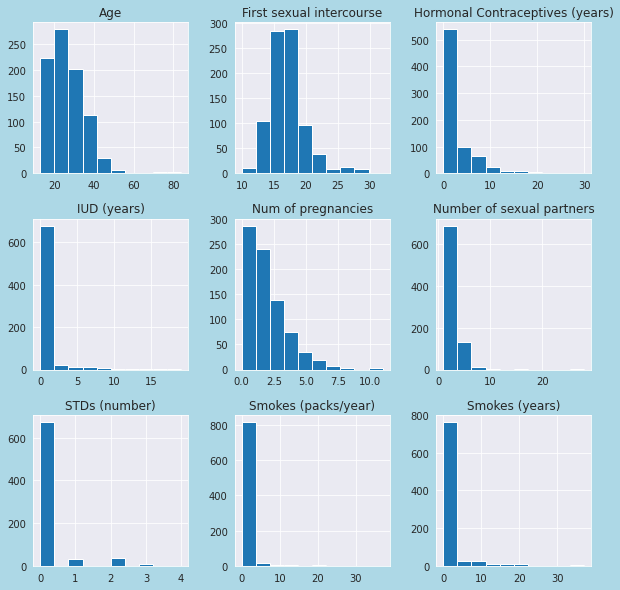

In [ ]:
p = df_raw[X_train.columns].hist(figsize = (10, 10))

All columns seem to be right skewed. In addition, HC, IUD, number of sexual partners, STDs, smokes columns seems to be skewed a lot with most values being 0.  
We might need to do some processing to reduce the skewness.

### Check for outliers.

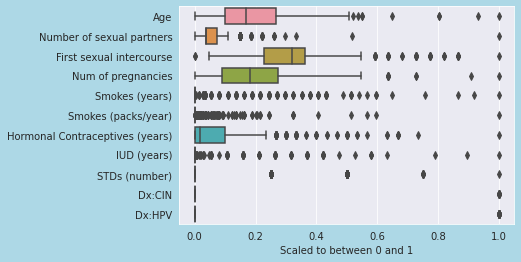

In [ ]:
gdf = skl.preprocessing.MinMaxScaler().fit_transform(df_raw[X_train.columns])
gdf = pd.DataFrame(gdf, columns = X_train.columns).melt()
sns.boxplot('value', 'variable', data = gdf)
plt.xlabel('Scaled to between 0 and 1')
p = plt.ylabel('')

During modeling, we might need to try dealing with outliers.

### Check for Biopsy(target) to different features relationships.

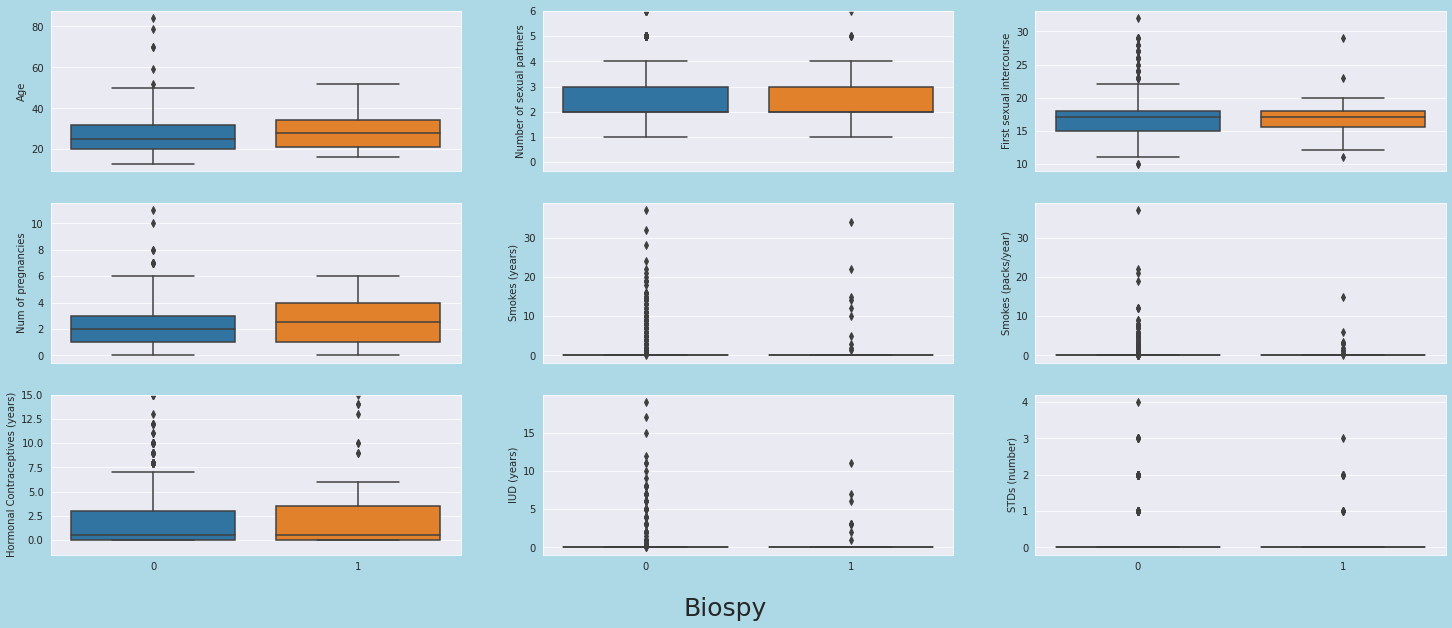

In [ ]:
fig, axs = plt.subplots(3, 3, sharex = 1 == 1, figsize = (25, 10))
axs = axs.flatten()
ax = iter(axs)
for col in X_train.columns[:-2]:
    a = next(ax)
    sns.boxplot('Biopsy', col, ax = a, data = df_raw)
    a.set_xlabel('')
    a.set_ylabel(col)
t = fig.text(0.5, 0.04, 'Biospy', ha='center', size = 25)
axs[1].set_ylim(top = 6)
p = axs[6].set_ylim(top = 15)

In [ ]:
X_test.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Hormonal Contraceptives (years)', 'IUD (years)',
       'STDs (number)', 'Dx:CIN', 'Dx:HPV', 'smokes'],
      dtype='object')

* People diagnosed with cancer seems to be older than those not diagnosed with cancer on average.
* It doesn't seem to be having much difference of the average number of sexual partners between people diagnosed with cancer and those are not.
* It doesn't seem to be having much difference of the average first sexual intercourse between people diagnosed with cancer and those are not.
* People diagnosed with cancer seems to be having higher number of pregnancies than those not diagnosed with cancer on average.
* It doesn't seem to be having much difference of the average HC years between people diagnosed with cancer and those are not.
* Smokes, HC, IUD, and STDs columns are all mostly 0 as seen in histograms.

In [ ]:
X_test.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'Dx:CIN', 'Dx:HPV'],
      dtype='object')

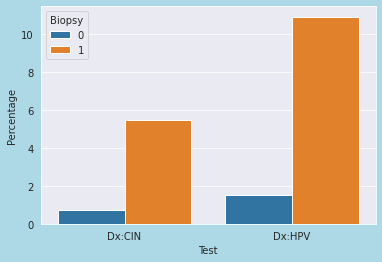

In [ ]:
tdf = df_raw.groupby('Biopsy').mean()[['Dx:CIN', 'Dx:HPV']].reset_index()
tdf.Biopsy = tdf.Biopsy.astype(str)
tdf = pd.melt(tdf, id_vars = 'Biopsy', var_name = 'Test', value_name = 'Percentage')
tdf.Percentage = tdf.Percentage * 100
p = sns.barplot('Test', 'Percentage', hue = 'Biopsy', data = tdf)

* Both CIN & HPV tests shows that people diagnosed with cancer has much higher percentage of being tested positive than those not diagnosed with cancer.

### Check features correlations

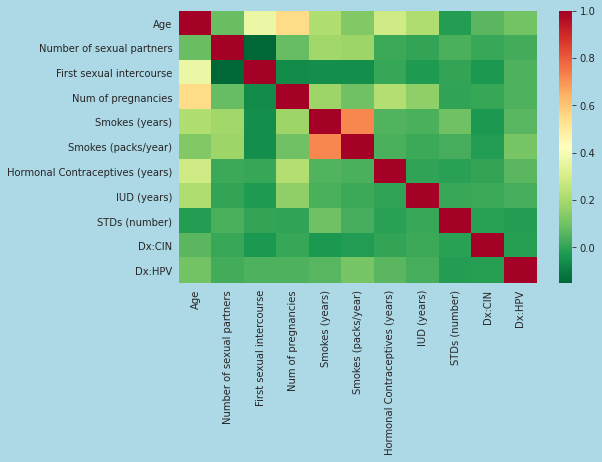

In [ ]:
plt.figure(figsize = (8, 5))
p = sns.heatmap(df_raw[X_train.columns].corr(), cmap="RdYlGn_r")

The only features that are alarmingly correlated to each other are the smokes columns, which is no surprise. These columns will be combined into 1.

# Pre-processing

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              529 non-null    int64
 1   Number of sexual partners        529 non-null    int64
 2   First sexual intercourse         529 non-null    int64
 3   Num of pregnancies               529 non-null    int64
 4   Smokes (years)                   529 non-null    int64
 5   Smokes (packs/year)              529 non-null    int64
 6   Hormonal Contraceptives (years)  529 non-null    int64
 7   IUD (years)                      529 non-null    int64
 8   STDs (number)                    529 non-null    int64
 9   Dx:CIN                           529 non-null    int64
 10  Dx:HPV                           529 non-null    int64
dtypes: int64(11)
memory usage: 45.6 KB


## Perform binning

In [ ]:
X_train_bin = X_train.copy()
X_test_bin = X_test.copy()

In [ ]:
X_train_bin.Age = X_train_bin.Age.values//10
X_test_bin.Age = X_test_bin.Age.values//10

In [ ]:
X_train_bin[['Number of sexual partners']].describe().T

,count,mean,std,min,25%,50%,75%,max
Number of sexual partners,529.0,2.536862,1.711996,1.0,2.0,2.0,3.0,28.0


In [ ]:
X_train_bin['Number of sexual partners'] = pd.cut(X_train_bin['Number of sexual partners'], [0, 1, 3, 99], labels = [1, 2, 3]).astype(int)
X_test_bin['Number of sexual partners'] = pd.cut(X_test_bin['Number of sexual partners'], [0, 1, 3, 99], labels = [1, 2, 3]).astype(int)

In [ ]:
X_train_bin[['First sexual intercourse']].describe().T

,count,mean,std,min,25%,50%,75%,max
First sexual intercourse,529.0,17.058601,2.813382,10.0,15.0,17.0,18.0,32.0


In [ ]:
X_train_bin['First sexual intercourse'] = pd.cut(X_train_bin['First sexual intercourse'], [9, 16, 25, 99], labels = [1, 2, 3]).astype(int)
X_test_bin['First sexual intercourse'] = pd.cut(X_test_bin['First sexual intercourse'], [9, 16, 25, 99], labels = [1, 2, 3]).astype(int)

In [ ]:
X_train_bin[['Num of pregnancies']].describe().T

,count,mean,std,min,25%,50%,75%,max
Num of pregnancies,529.0,2.344045,1.448212,0.0,1.0,2.0,3.0,10.0


In [ ]:
X_train_bin['Num of pregnancies'] = pd.cut(X_train_bin['Num of pregnancies'], [-1, 0, 2, 4, 99], labels = [0, 1, 2, 3]).astype(int)
X_test_bin['Num of pregnancies'] = pd.cut(X_test_bin['Num of pregnancies'], [-1, 0, 2, 4, 99], labels = [0, 1, 2, 3]).astype(int)

In [ ]:
X_train_bin[['Hormonal Contraceptives (years)']].describe().T

,count,mean,std,min,25%,50%,75%,max
Hormonal Contraceptives (years),529.0,2.304348,3.858285,0.0,0.0,0.0,3.0,20.0


In [ ]:
X_train_bin['Hormonal Contraceptives (years)'].value_counts()

0     290
1      54
2      30
3      25
5      22
6      21
4      20
7      16
8      12
9       8
10      8
15      6
12      4
20      4
19      2
13      2
14      2
11      1
16      1
17      1
Name: Hormonal Contraceptives (years), dtype: int64

In [ ]:
X_train_bin['Hormonal Contraceptives (years)'] = pd.cut(X_train_bin['Hormonal Contraceptives (years)'], [-1, 0, 1, 4, 99],\
                                                        labels = [0, 1, 2, 3]).astype(int)
X_test_bin['Hormonal Contraceptives (years)'] = pd.cut(X_test_bin['Hormonal Contraceptives (years)'], [-1, 0, 1, 4, 99],\
                                                       labels = [0, 1, 2, 3]).astype(int)

In [ ]:
X_train_bin[['STDs (number)']].describe().T

,count,mean,std,min,25%,50%,75%,max
STDs (number),529.0,0.155009,0.51362,0.0,0.0,0.0,0.0,4.0


In [ ]:
X_train_bin['STDs (number)'].value_counts()

0    478
2     26
1     23
4      1
3      1
Name: STDs (number), dtype: int64

STDs (number) column almost contains all 0, so anything not 0 we'll just indicate with 1.

In [ ]:
X_train_bin['STDs (number)'] = (X_train_bin['STDs (number)'].values > 0).astype(int)
X_test_bin['STDs (number)'] = (X_test_bin['STDs (number)'].values > 0).astype(int)

In [ ]:
X_train_bin[['IUD (years)']].describe().T

,count,mean,std,min,25%,50%,75%,max
IUD (years),529.0,0.616257,2.208412,0.0,0.0,0.0,0.0,19.0


In [ ]:
X_train_bin['IUD (years)'].value_counts()[:6]

0    473
8      7
7      7
3      7
4      6
2      6
Name: IUD (years), dtype: int64

IUD (years) column almost contains all 0, so anything not 0 we'll just indicate with 1.

In [ ]:
X_train_bin['IUD (years)'] = (X_train_bin['IUD (years)'].values > 0).astype(int)
X_test_bin['IUD (years)'] = (X_test_bin['IUD (years)'].values > 0).astype(int)


## Combine 2 smokes columns

In [ ]:
X_train['smokes'] = X_train['Smokes (packs/year)'].values * X_train['Smokes (years)'].values
X_test['smokes'] = X_test['Smokes (packs/year)'].values * X_test['Smokes (years)'].values
X_train.drop(columns = ['Smokes (years)', 'Smokes (packs/year)'], inplace = 1 == 1)
X_test.drop(columns = ['Smokes (years)', 'Smokes (packs/year)'], inplace = 1 == 1)
X_train_bin['smokes'] = X_train_bin['Smokes (packs/year)'].values * X_train_bin['Smokes (years)'].values
X_test_bin['smokes'] = X_test_bin['Smokes (packs/year)'].values * X_test_bin['Smokes (years)'].values
X_train_bin.drop(columns = ['Smokes (years)', 'Smokes (packs/year)'], inplace = 1 == 1)
X_test_bin.drop(columns = ['Smokes (years)', 'Smokes (packs/year)'], inplace = 1 == 1)

In [ ]:
X_train_bin[['smokes']].describe().T

,count,mean,std,min,25%,50%,75%,max
smokes,529.0,8.52741,70.39192,0.0,0.0,0.0,0.0,1369.0


In [ ]:
X_train_bin['smokes'].value_counts()[:10]

0     485
2       4
16      3
18      2
36      2
25      2
7       2
9       2
72      2
22      1
Name: smokes, dtype: int64

smokes column almost contains all 0, so anything not 0 we'll just indicate with 1.

In [ ]:
X_train_bin.smokes = (X_train_bin.smokes.values > 0).astype(int)
X_test_bin.smokes = (X_test_bin.smokes.values > 0).astype(int)

## Use Smote Algorithm to deal with imbalance data.

In [ ]:
X_smote_bin, y_smote_bin = smote().fit_resample(X_train_bin, y_train)
X_smote, y_smote = smote().fit_resample(X_train, y_train)
X_smote_bin = pd.DataFrame(X_smote_bin, columns = X_train_bin.columns)
X_smote = pd.DataFrame(X_smote, columns = X_train.columns)

### Scale data

In [ ]:
scaler = skl.preprocessing.MinMaxScaler()
scaler.fit(X_smote)
X_smote_scale = pd.DataFrame(scaler.transform(X_smote), columns = X_smote.columns)
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns = X_smote.columns)

# Modeling

In [ ]:
grids = {
    'Random Forest': {'n_estimators': [50, 100, 200, 500], 
                     'criterion': ['gini', 'entropy'], 
                     'min_samples_split': [2, 5, 10, 20]},
    
    'Ada Boosted Decision Tree': {'n_estimators': [50, 100, 200, 500], 
                     'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10], 
                     'algorithm': ['SAMME', 'SAMME.R']},
         
    'Gradient Boosted Decision Tree': {'learning_rate': [.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                                       'n_estimators': [20, 50, 100, 200],
                                       'criterion': ['friedman_mse', 'mse', 'mae'],
                                       'min_samples_split': [2, 5, 10, 20],
                                       'max_depth': [3, 5, 7]},
         
    'SVM': {'C': [10**p for p in range(-2, 3)],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2, 3 , 4],
            'gamma': ['scale', 'auto'],
            'class_weight': [{0:.3, 1:.7}, {0:.2, 1:.8}, {0:.4, 1:.6}, None]},
    
    'KNN': {'n_neighbors': [3, 5, 8 , 10, 20],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [20, 25, 30 , 35, 40],
            'p': range(1, X_smote_bin.shape[0] + 1),
            'weights': ['uniform', 'distance']},
    
    'Logistic Regression': {'C':  [10**p for p in range(-2, 3)],
                            'class_weight': [{0:.3, 1:.7}, {0:.2, 1:.8}, {0:.4, 1:.6}, None],
                            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                            'penalty': ['l1', 'l2', 'elasticnet']},
    
    'Ridge Regression Classifier': {'alpha': [.1, 1, 1.5, 2, 2.5],
                                    'class_weight': [{0:.3, 1:.7}, {0:.2, 1:.8}, {0:.4, 1:.6}, None],
                                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
}
clfs = [skl.ensemble.RandomForestClassifier(), skl.ensemble.AdaBoostClassifier(), 
                                       skl.ensemble.GradientBoostingClassifier(),skl.svm.SVC(), skl.neighbors.KNeighborsClassifier(), 
                                       skl.linear_model.LogisticRegression(), skl.linear_model.RidgeClassifier()]
score = skl.metrics.make_scorer(skl.metrics.f1_score)

### Use the unbinned scaled data with SMOTE for model selection.

In [ ]:
scores = []
params = []
for grid, mod in zip(grids.values(), clfs):
    clf = skl.model_selection.RandomizedSearchCV(mod, grid, scoring = score, cv = 3)
    search = clf.fit(X_smote_scale, y_smote)
    params += [search.best_params_]
    scores += [search.best_score_.round(2)]
df_models = pd.DataFrame({'model': list(grids.keys()), 'cv_score_recall': scores, 'parameters': params, 'note': 'Scaled'})
df_models

,model,cv_score_recall,parameters,note
0,Random Forest,0.84,"{'n_estimators': 100, 'min_samples_split': 2, ...",Scaled
1,Ada Boosted Decision Tree,0.72,"{'n_estimators': 500, 'learning_rate': 1, 'alg...",Scaled
2,Gradient Boosted Decision Tree,0.81,"{'n_estimators': 50, 'min_samples_split': 2, '...",Scaled
3,SVM,0.77,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': ...",Scaled
4,KNN,0.76,"{'weights': 'distance', 'p': 189, 'n_neighbors...",Scaled
5,Logistic Regression,0.67,"{'solver': 'saga', 'penalty': 'l1', 'class_wei...",Scaled
6,Ridge Regression Classifier,0.67,"{'solver': 'cholesky', 'class_weight': {0: 0.4...",Scaled


Seems like Random Forest and GB Decision tree has the best predicting power. We'll just use Random Forest.

In [ ]:
best_params = df_models.parameters[0]

### Scaling doesn't matter for Random Forest, but let's double check.

In [ ]:
clf = skl.ensemble.RandomForestClassifier(**best_params)
skl.model_selection.cross_val_score(clf, X_smote, y_smote, scoring = score, cv = 3).mean().round(2)

0.84

### Check if using binned data improve the predicting power of Random Forest.

In [ ]:
clf = skl.ensemble.RandomForestClassifier(**best_params)
skl.model_selection.cross_val_score(clf, X_smote_bin, y_smote_bin, scoring = score, cv = 3).mean().round(2)

0.77

Binning data seems to reduce the model's predicting power.

### Random Forest is robust to skewed features, but lets just double check.

In [ ]:
X_smote.skew()

Age                                 1.028711
Number of sexual partners           6.559034
First sexual intercourse            1.451518
Num of pregnancies                  1.184885
Hormonal Contraceptives (years)     2.120293
IUD (years)                         5.311012
STDs (number)                       3.279269
Dx:CIN                             17.663422
Dx:HPV                              7.746433
smokes                             17.309353
dtype: float64

Log tranform to reduce skewness

In [ ]:
def log_trans(x):
    if x == 0: return np.log(.00000001)
    return np.log(x)
X_smote_log = X_smote.applymap(log_trans)
X_smote_log.skew()

Age                                 0.266489
Number of sexual partners          -0.188863
First sexual intercourse            0.784278
Num of pregnancies                 -9.254803
Hormonal Contraceptives (years)     0.269036
IUD (years)                         1.789011
STDs (number)                       2.212269
Dx:CIN                             17.663422
Dx:HPV                              7.036365
smokes                              2.608353
dtype: float64

The log transformation helped to reduce the skewness except STDs. 

In [ ]:
clf = skl.ensemble.RandomForestClassifier(**best_params)
skl.model_selection.cross_val_score(clf, X_smote_log, y_smote, scoring = score, cv = 3).mean().round(2)

0.83

No effect as expected.

### Try dropping some features

In [ ]:
clf = skl.ensemble.RandomForestClassifier(**best_params)
clf.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Check for important features

In [ ]:
feat_imp = pd.Series(clf.feature_importances_, index = X_smote.columns).sort_values(ascending = 1 == 2)
feat_imp

Age                                0.264026
First sexual intercourse           0.195484
Number of sexual partners          0.137785
Num of pregnancies                 0.123777
Hormonal Contraceptives (years)    0.115082
smokes                             0.059266
STDs (number)                      0.057971
IUD (years)                        0.042151
Dx:HPV                             0.003713
Dx:CIN                             0.000746
dtype: float64

Use top 5 most important features to see if model improves.

In [ ]:
clf = skl.ensemble.RandomForestClassifier(**best_params)
skl.model_selection.cross_val_score(clf, X_smote[feat_imp.index[:5]], y_smote, scoring = score, cv = 3).mean().round(2)

0.81

Dropping features does not improve the model.

In [ ]:
X_smote.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,942.0,27.114650,8.145960,13.0,21.0,26.0,32.75,79.0
Number of sexual partners,942.0,2.329087,1.441743,1.0,1.0,2.0,3.00,28.0
First sexual intercourse,942.0,16.773885,2.388165,10.0,15.0,17.0,18.00,32.0
Num of pregnancies,942.0,2.225053,1.285201,0.0,1.0,2.0,3.00,10.0
Hormonal Contraceptives (years),942.0,2.282378,3.985479,0.0,0.0,0.0,3.00,20.0
IUD (years),942.0,0.472399,1.775013,0.0,0.0,0.0,0.00,19.0
STDs (number),942.0,0.160297,0.466514,0.0,0.0,0.0,0.00,4.0
Dx:CIN,942.0,0.003185,0.056373,0.0,0.0,0.0,0.00,1.0
Dx:HPV,942.0,0.015924,0.125246,0.0,0.0,0.0,0.00,1.0
smokes,942.0,8.384289,55.796054,0.0,0.0,0.0,0.00,1369.0


# Final model
The final model would be Random Forest with original data scale.

Try and see if we can improve model performance by using Bayesian Optimization for hyper parameters tuning.

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

In [ ]:
def rf_cv_f1(criterion, min_samples_split, n_estimators):
    criterion, min_samples_split, n_estimators = [int(x) for x in [criterion, min_samples_split, n_estimators]]
    criterion_dict = {1:'gini', 2:'entropy'}
    rf = skl.ensemble.RandomForestClassifier(criterion = criterion_dict[criterion], min_samples_split = min_samples_split, 
                                             n_estimators = n_estimators)
    return skl.model_selection.cross_val_score(rf, X_smote, y_smote, scoring = score, cv = 3).mean().round(2)

def get_params(dict_):
    dict_['criterion'] = {1:'gini', 2:'entropy'}[int(dict_['criterion'])]
    dict_['min_samples_split'] = int(dict_['min_samples_split'])
    dict_['n_estimators'] = int(dict_['n_estimators'])
    return dict_

rf_bo = BayesianOptimization(rf_cv_f1, {'criterion': (1, 2.99999), 'min_samples_split': (2, 500), 'n_estimators': (50, 500)})
rf_bo.maximize(n_iter = 20)

|   iter    |  target   | criterion | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.58     |  2.885    |  344.7    |  496.5    |
|  2        |  0.7      |  1.977    |  66.54    |  353.7    |
|  3        |  0.22     |  2.521    |  478.4    |  210.1    |
|  4        |  0.44     |  2.111    |  478.9    |  433.3    |
|  5        |  0.71     |  2.474    |  55.35    |  179.8    |
|  6        |  0.84     |  3.0      |  2.0      |  500.0    |
|  7        |  0.83     |  2.621    |  2.0      |  50.0     |
|  8        |  0.7      |  1.513    |  68.79    |  355.4    |
|  9        |  0.83     |  2.071    |  2.276    |  499.0    |
|  10       |  0.64     |  1.168    |  230.5    |  50.52    |
|  11       |  0.66     |  2.975    |  122.4    |  500.0    |
|  12       |  0.64     |  2.907    |  257.3    |  282.4    |
|  13       |  0.7      |  2.838    |  94.15    |  51.28    |
|  14       |  0.83     |  2.665    |  2.06     |  125.2    |
|  15   

In [ ]:
best_params = get_params(rf_bo.max['params'])

No better hyperparameter found. However we can still use the best parameters found here which has the same performance like random search.

In [ ]:
final_model = skl.ensemble.RandomForestClassifier(**best_params)
final_model.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Look at our testing data

In [ ]:
y_test.value_counts(normalize = 1 == 1)

0    0.932886
1    0.067114
Name: Biopsy, dtype: float64

There're only about 7% of the people diagnosed with cancer.

# Check how the model performs on testing data

In [ ]:
report = skl.metrics.classification_report(y_test, final_model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       139
           1       0.14      0.40      0.21        10

    accuracy                           0.79       149
   macro avg       0.54      0.61      0.54       149
weighted avg       0.90      0.79      0.83       149



The model can correctly predict about 40% of the cancer patients in our testing data. This is not good, but It's still a lot better than just doing some random guessing.

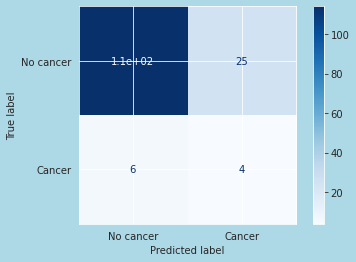

In [ ]:
p = skl.metrics.plot_confusion_matrix(final_model, X_test, y_test, cmap = 'Blues',display_labels = ['No cancer', 'Cancer'])

Lets see what are the important features for predicting cancer.

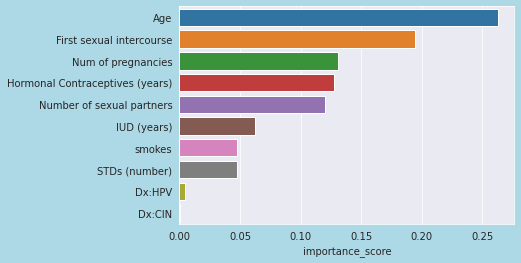

In [ ]:
imp_feat = pd.Series(final_model.feature_importances_, index = X_smote.columns).sort_values(ascending = 1 == 2).reset_index()
imp_feat.columns = ['feature', 'importance_score']
sns.barplot('importance_score', 'feature', data = imp_feat)
p = plt.ylabel('')

* Age & First sexual intercourse are the 2 high risk factors for Cervical Cancer.
* Number of sexual partners, HC, & Number of pregnancies are the 3 medium risk factors for Cervical Cancer.